__Web scraping final project__

1. [Import](#Import)
1. [Web scraping project](#Web-scraping-project)
    1. [Load data](#Load-data)
    1. [EDA](#EDA)

# Import

<a id = 'Import'></a>

In [4]:
# Standard libary and settings
import os
import sys
import importlib
import itertools
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# Data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# Visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# Magic functions
%matplotlib inline

# Web scraping project

This notebook includes an analysis of the baseball data that was scraped using scrapy

<a id = 'Web-scraping-project'></a>

## Load data

<a id = 'load-data'></a>

In [5]:
# load data
df = pd.read_csv("s3://tdp-ml-datasets/misc/teams.csv")
df = df[
    [
        "name",
        "age",
        "year",
        "team",
        "league",
        "games",
        "plateAppearances",
        "atBats",
        "battingAverage",
        "hits",
        "doubles",
        "triples",
        "homeRuns",
        "runs",
        "baseOnBalls",
        "intentionalBaseOnBalls",
        "strikeouts",
        "onBasePercentage",
        "runsBattedIn",
        "stolenBases",
        "caughtStealing",
        "doublePlaysGroundedInto",
        "hitByPitch",
        "sacrificeHits",
        "sluggingPercentage",
        "totalBases",
    ]
]
df[:10]

,name,age,year,team,league,games,plateAppearances,atBats,battingAverage,hits,...,strikeouts,onBasePercentage,runsBattedIn,stolenBases,caughtStealing,doublePlaysGroundedInto,hitByPitch,sacrificeHits,sluggingPercentage,totalBases
0,Bryce Harper,19,2012,WSN,NL,139.000000,597.000000,533.000000,0.270000,144.000000,...,120.000000,0.340000,59.000000,18.000000,6.000000,8.000000,2.000000,3.000000,0.477000,254.000000
1,Juan Soto,19,2018,WSN,NL,116.000000,494.000000,414.000000,0.292000,121.000000,...,99.000000,0.406000,70.000000,5.000000,2.000000,9.000000,0.000000,1.000000,0.517000,214.000000
2,Jurickson Profar,19,2012,TEX,AL,9.000000,17.000000,17.000000,0.176000,3.000000,...,4.000000,0.176000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.471000,8.000000
3,Adrián Beltré,19,1998,LAD,NL,77.000000,214.000000,195.000000,0.215000,42.000000,...,37.000000,0.278000,22.000000,3.000000,1.000000,4.000000,3.000000,2.000000,0.369000,72.000000
4,Manny Machado,19,2012,BAL,AL,51.000000,202.000000,191.000000,0.262000,50.000000,...,38.000000,0.294000,26.000000,2.000000,0.000000,6.000000,0.000000,1.000000,0.445000,85.000000
5,Mike Trout,19,2011,LAA,AL,40.000000,135.000000,123.000000,0.220000,27.000000,...,30.000000,0.281000,16.000000,4.000000,0.000000,2.000000,2.000000,0.000000,0.390000,48.000000
6,Justin Upton,19,2007,ARI,NL,43.000000,152.000000,140.000000,0.221000,31.000000,...,37.000000,0.283000,11.000000,2.000000,0.000000,3.000000,1.000000,0.000000,0.364000,51.000000
7,Víctor Robles,20,2017,WSN,NL,13.000000,27.000000,24.000000,0.250000,6.000000,...,6.000000,0.308000,4.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.458000,11.000000
8,Bryce Harper,20,2013,WSN,NL,118.000000,497.000000,424.000000,0.274000,116.000000,...,94.000000,0.368000,58.000000,11.000000,4.000000,4.000000,5.000000,3.000000,0.486000,206.000000
9,Ryan Zimmerman,20,2005,WSN,NL,20.000000,62.000000,58.000000,0.397000,23.000000,...,12.000000,0.419000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.569000,33.000000


## EDA

<a id = 'EDA'></a>

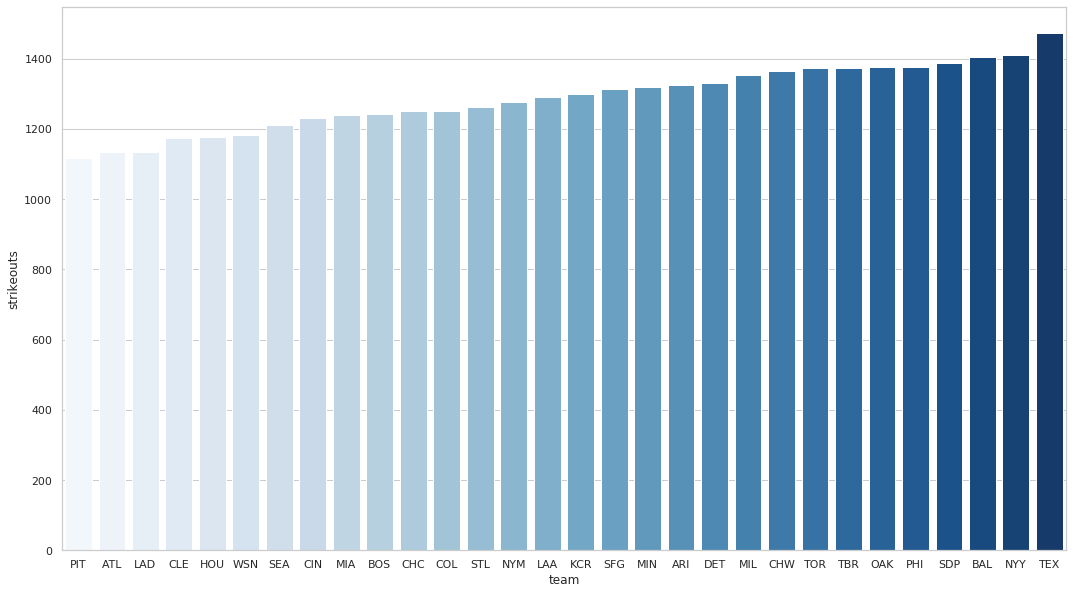

In [6]:
# total strikeouts per team in 2018
topics = "strikeouts"

sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.barplot(
    x="team",
    y=topics,
    palette="Blues",
    data=df[df["year"] == 2018]
    .groupby(["year", "league", "team"])[[topics]]
    .sum()
    .reset_index()
    .sort_values([topics], ascending=[True]),
)

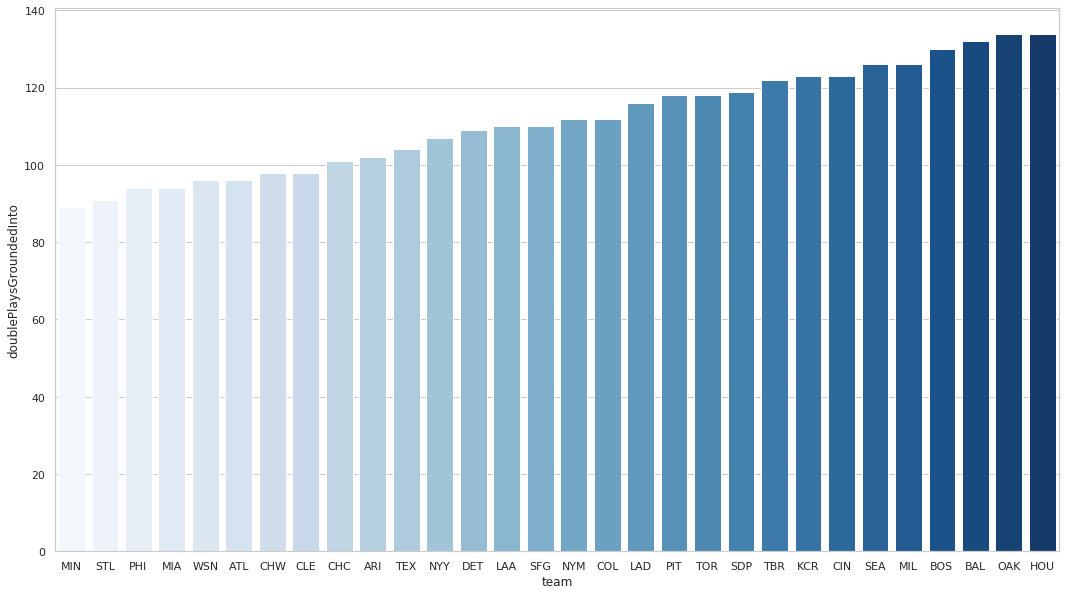

In [7]:
# total double plays grounded into per team in 2018
topics = "doublePlaysGroundedInto"

sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.barplot(
    x="team",
    y=topics,
    palette="Blues",
    data=df[df["year"] == 2018]
    .groupby(["year", "league", "team"])[[topics]]
    .sum()
    .reset_index()
    .sort_values([topics], ascending=[True]),
)

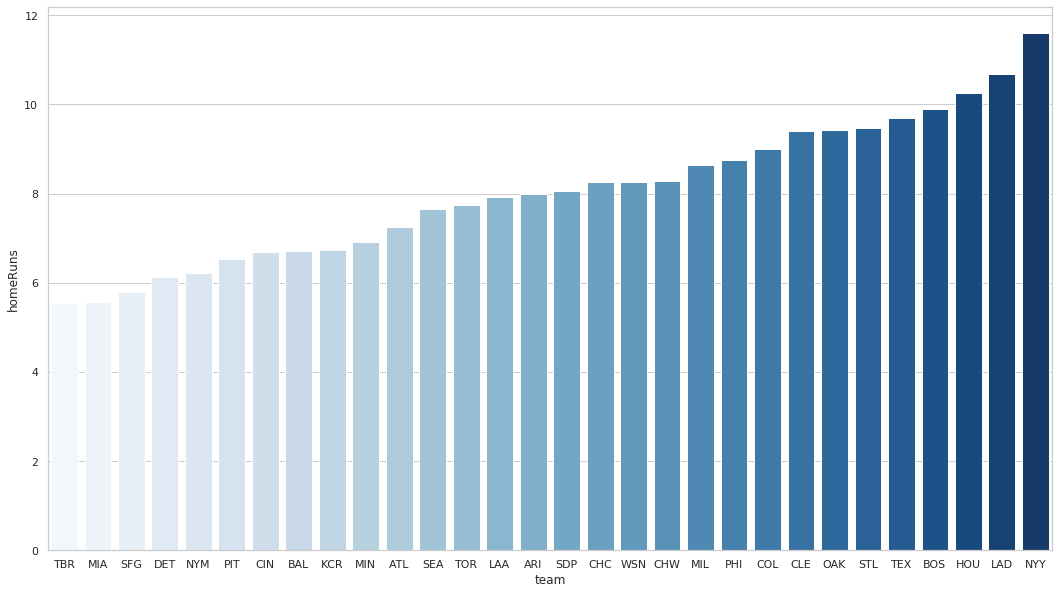

In [8]:
# average home runs per player in 2018
topics = "homeRuns"

sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.barplot(
    x="team",
    y=topics,
    palette="Blues",
    data=df[df["year"] == 2018]
    .groupby(["year", "league", "team"])[[topics]]
    .mean()
    .reset_index()
    .sort_values([topics], ascending=[True]),
)

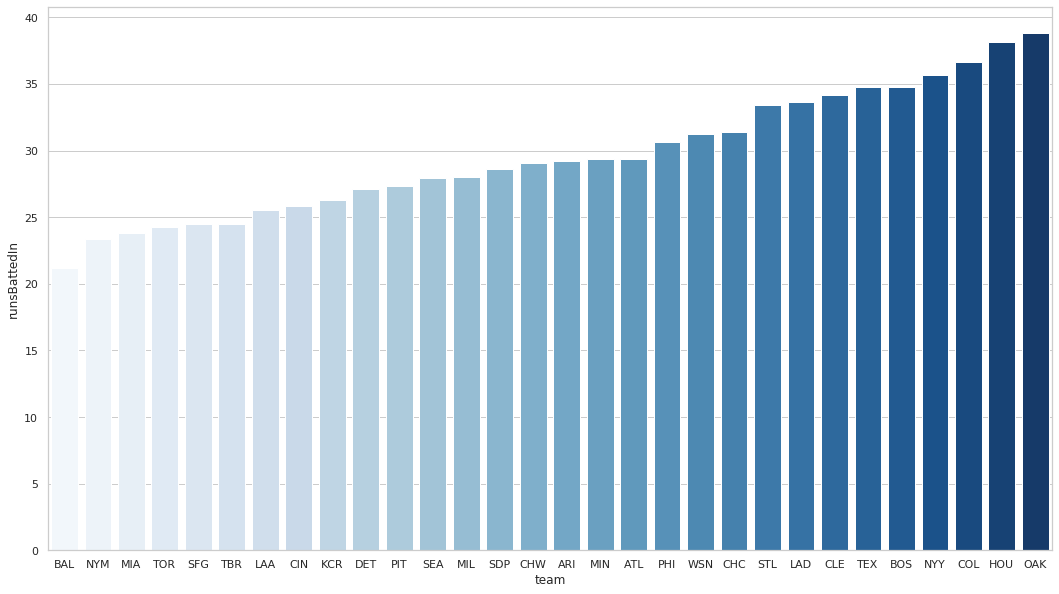

In [9]:
# average runs batted in per player in 2018
topics = "runsBattedIn"

sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.barplot(
    x="team",
    y=topics,
    palette="Blues",
    data=df[df["year"] == 2018]
    .groupby(["year", "league", "team"])[[topics]]
    .mean()
    .reset_index()
    .sort_values([topics], ascending=[True]),
)

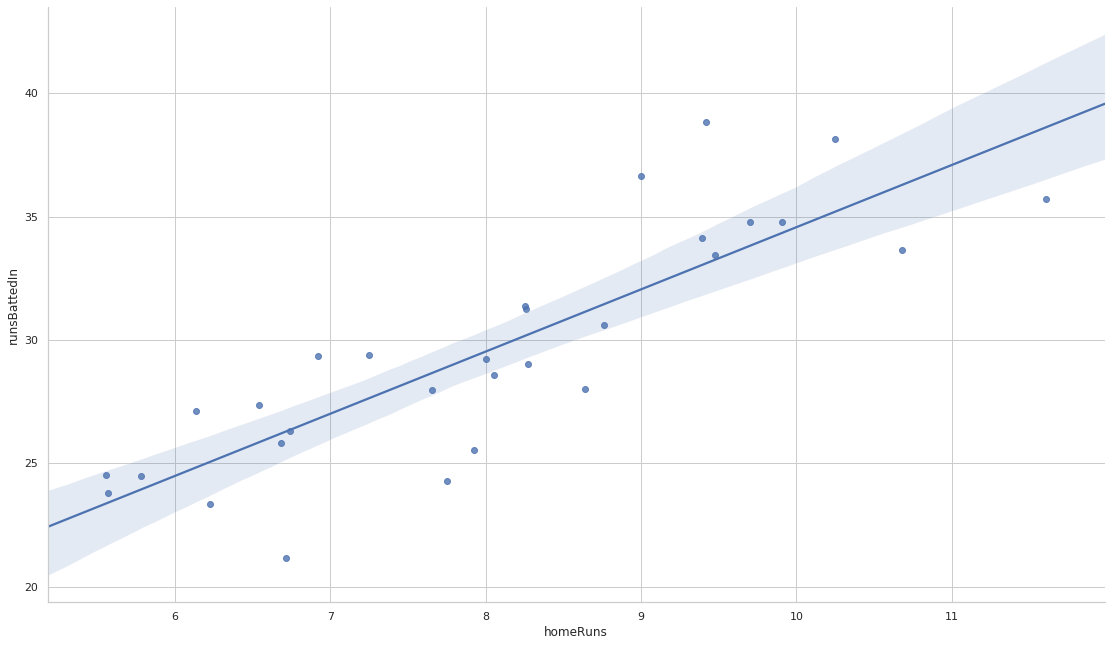

In [10]:
# scatter home runs vs. runs batted in, display regression line
hrs = (
    df[df["year"] == 2018]
    .groupby(["year", "league", "team"])[["homeRuns"]]
    .mean()
    .reset_index()
    .sort_values(["homeRuns"], ascending=[True])
)
rbis = (
    df[df["year"] == 2018]
    .groupby(["year", "league", "team"])[["runsBattedIn"]]
    .mean()
    .reset_index()
    .sort_values(["runsBattedIn"], ascending=[True])
)

newDf = rbis.merge(hrs, on=["year", "league", "team"])
sns.set(style="whitegrid")
g = sns.lmplot(x="homeRuns", y="runsBattedIn", data=newDf)
g.fig.set_size_inches(18, 10)